In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PySDM import Formulae
from PySDM.physics import si
from open_atmos_jupyter_utils import show_plot
from height_temperature import data2025Mar28

In [2]:
formulae = Formulae(
    isotope_equilibrium_fractionation_factors='Majoube1971+LambEtAl2017',
    isotope_diffusivity_ratios='Stewart1975'
)

In [3]:
def alpha_kin(RH, alpha_s, D_rat):
    return RH / (alpha_s/D_rat*(RH-1)+1)

In [4]:
RH = np.linspace(0.85,1.4, 12)
print(RH)
temperature = np.linspace(230.15, 268.15, 10)*si.K # TODO
alpha_l = formulae.isotope_equilibrium_fractionation_factors.alpha_l_2H(temperature)
alpha_i = formulae.isotope_equilibrium_fractionation_factors.alpha_i_2H(temperature)
D_rat = formulae.isotope_diffusivity_ratios.ratio_2H(temperature)

[0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4 ]


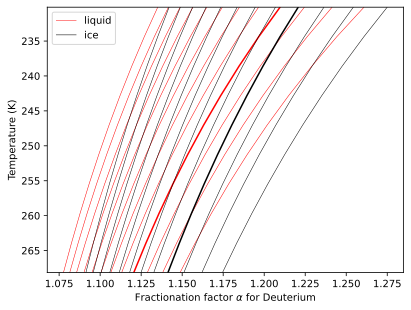

In [5]:
for rh in RH:
    for phase in ('liquid', 'ice'):
        alpha_eq = locals()[f"alpha_{phase[0]}"]
        plt.plot(
            alpha_eq * alpha_kin(rh, alpha_eq, D_rat),
            temperature,
            color='black' if phase == 'ice' else 'red',
            label=phase if rh == RH[0] else '',
            linewidth=1.5 if rh == 1 else .5,
        )
plt.xlabel('Fractionation factor $\\alpha$ for Deuterium')
plt.ylabel('Temperature (K)')

plt.legend()
plt.ylim(temperature[-1], temperature[0])
show_plot("Fractionation_factor_of_temperature.pdf")

In [6]:
data2025Mar28

,height,temperature [C]
0,790,13.6
1,920,14.0
2,1014,13.2
3,1080,13.4
4,1156,15.4
...,...,...
159,32571,-45.5
160,32749,-44.1
161,33025,-45.1
162,33120,-43.9


In [7]:
RH = np.linspace(0.85,1.4, 12)
temperature_data = (data2025Mar28['temperature [C]'] + 273.15)*si.K
alpha_l = formulae.isotope_equilibrium_fractionation_factors.alpha_l_2H(temperature_data)
alpha_i = formulae.isotope_equilibrium_fractionation_factors.alpha_i_2H(temperature_data)
D_rat = formulae.isotope_diffusivity_ratios.ratio_2H(temperature_data)
for rh in RH:
    for phase in ('liquid', 'ice'):
        alpha_eq = locals()[f"alpha_{phase[0]}"]
        plt.plot(
            alpha_eq * alpha_kin(rh, alpha_eq, D_rat),
            data2025Mar28['height'],
            color='black' if phase == 'ice' else 'red',
            label=phase if rh == RH[0] else '',
            linewidth=1.5 if rh == 1 else .5,
        )
plt.xlabel('Fractionation factor $\\alpha$ for Deuterium')
plt.ylabel('Altitude [m]')

plt.legend()
show_plot("Fractionation_factor_of_height.pdf")

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
non-precise type pyobject
During: typing of argument at <string> (2)

File "<string>", line 2:
<source missing, REPL/exec in use?> 

This error may have been caused by the following argument(s):
- argument 0: Cannot determine Numba type of <class 'pandas.core.series.Series'>
